In [1]:
from os import walk
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt

tomato3_path = '../Datasets/train/Tomato 3/'

filenames = next(walk(tomato3_path), (None, None, []))[2]  # [] if no file

img = Image.open(tomato3_path + filenames[0])

color_data = asarray(img)

red_channel = asarray(img)
blue_channel = asarray(img)
green_channel = asarray(img)

print(type(color_data[0]))
print("color channel", color_data[300:400]) #To display values in the middle of the dataset

<class 'numpy.ndarray'>
color channel [[[255 254 251]
  [255 254 251]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 251]
  [255 254 251]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 251]
  [255 254 251]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 254]
  [255 253 254]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [2]:
#Changing all white pixels to black on the image
#Not sure if the red channel should be handled in the same way as the blue and green channel.
for array in red_channel: 
    for pixel in array:
        if(
            (pixel[0] < 256 and pixel[0] > 244) or
            (pixel[1] < 256 and pixel[0] > 244) or
            (pixel[2] < 256 and pixel[0] > 244)
            ):
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 0 

for array in blue_channel:
    for pixel in array:
        if(
           (pixel[0] < 256 and pixel[0] > 244) or
           (pixel[1] < 256 and pixel[0] > 244) or
           (pixel[2] < 256 and pixel[0] > 244)
           ):
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 0
        else:
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 255
            
for array in green_channel:
    for pixel in array:
        if(
           (pixel[0] < 256 and pixel[0] > 244) or
           (pixel[1] < 256 and pixel[0] > 244) or
           (pixel[2] < 256 and pixel[0] > 244)
           ):
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 0
#         elif(
#              (pixel[0] < 256 and pixel[0] > 244) or
#              (pixel[1] < 10 and pixel[0] >= 0) or
#              (pixel[2] < 10 and pixel[0] >= 0)
#             ):
        else:
            pixel[0] = 0
            pixel[1] = 255
            pixel[2] = 0
            
#Hvor alle tre kolonner er 255 sæt til 0 (hvid til sort)
#Split hver kolonne til et nyt np array med kun værdier fra den valgte kolonne
# Kolonne1: R, Kolonne2: G, Kolonne3: B


In [3]:
#Printing red channel
print(type(red_channel))
print("red channel", red_channel)

<class 'numpy.ndarray'>
red channel [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


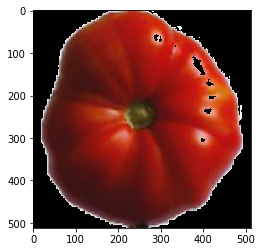

In [4]:
#Displaying red channel
plt.imshow(red_channel, interpolation='nearest')

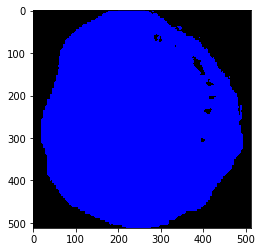

In [5]:
#Displaying blue channel
plt.imshow(blue_channel, interpolation='nearest')

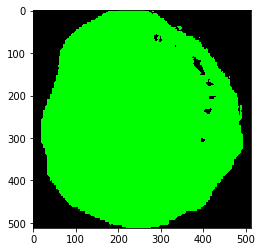

In [6]:
#Displaying green channel
plt.imshow(green_channel, interpolation='nearest')

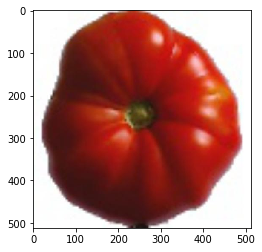

In [7]:
#Displaying normal channel
plt.imshow(color_data, interpolation='nearest')

In [8]:
for filename in filenames:
    img = Image.open(tomato3_path + filename)
    
    imgGray = img.convert('L')
    imgGray.save('../Datasets/train/Grey/Tomato 3/' + filename)
    
    # Split into 3 channels
    r, g, b = img.split()

    # Decrease green and blue
    redG = g.point(lambda i: i * 0.00001)
    redBb = b.point(lambda i: i * 0.00001)
    
    imgRed = Image.merge('RGB', (r, redG, redBb))
    imgRed.save('../Datasets/train/Red/Tomato 3/' + filename)
    
    greenR = r.point(lambda i: i * 0.00001)
    greenb = b.point(lambda i: i * 0.00001)
    
    imgGreen = Image.merge('RGB', (greenR, g, greenb))
    imgGreen.save('../Datasets/train/Green/Tomato 3/' + filename)
    
    blueRed = r.point(lambda i: i * 0.00001)
    blueGreen = g.point(lambda i: i * 0.00001)
    
    imgBlue = Image.merge('RGB', (blueRed, blueGreen, b))
    imgBlue.save('../Datasets/train/Blue/Tomato 3/' + filename)
    